In [571]:
#!pip install scikit_learn

In [572]:
#!pip install matplotlib

In [573]:
#!pip install seaborn

In [574]:
#!pip install statsmodels

In [575]:
#!pip install LightGBM

In [576]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold, ShuffleSplit
from sklearn.pipeline import Pipeline

In [577]:
df_train = pd.read_csv('Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_values.csv')

In [578]:
df_train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [579]:
df_train_label = pd.read_csv('Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_labels.csv')

In [580]:
df_train.shape

(59400, 40)

## Split Data

In [581]:
df_train = df_train.merge(df_train_label[['id','status_group']], on='id', how = 'left')
df_train.rename (columns={'status_group':'label'}, inplace=True)

In [582]:
df_train['label'].isna().any()

np.False_

In [583]:
X = df_train.drop(columns=['label'])
y = df_train['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [584]:
X_train.shape

(47520, 40)

In [585]:
y_train.dtypes

dtype('O')

## Load other data

In [586]:
df_submission_sample = pd.read_csv('Pump_it_Up_Data_Mining_the_Water_Table_-_Submission_format.csv')

In [587]:
df_submission_sample.head(10)

,id,status_group
0,50785,predicted label
1,51630,predicted label
2,17168,predicted label
3,45559,predicted label
4,49871,predicted label
5,52449,predicted label
6,24806,predicted label
7,28965,predicted label
8,36301,predicted label
9,54122,predicted label


In [588]:
df_test = pd.read_csv('Pump_it_Up_Data_Mining_the_Water_Table_-_Test_set_values.csv')    ## Final test data for submission

In [589]:
df_test.shape

(14850, 40)

## EDA & Feature Engineering

In [590]:
pd.set_option('display.max_columns', None)

In [591]:
X_train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
55424,70623,0.0,2011-04-07,Government Of Tanzania,1565,DWE,38.267292,-4.783454,Msikitini,0,Pangani,Irente Juu,Tanga,4,1,Lushoto,Lushoto,1,True,GeoData Consultants Ltd,VWC,Irente juu stree,True,1994,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
28170,55587,50.0,2013-02-12,Government Of Tanzania,1522,Government,36.561550,-5.309293,Kwa Mong`I,0,Internal,Kanisani,Manyara,21,4,Kiteto,Kibaya,1,False,GeoData Consultants Ltd,Water Board,KIUWASSA,False,1997,submersible,submersible,submersible,water board,user-group,pay per bucket,per bucket,salty,salty,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
20007,7929,0.0,2013-03-30,Ncaa,1838,NCAA,35.269396,-3.217454,Shuleni,0,Internal,Madukani,Arusha,2,5,Ngorongoro,Endulen,180,NaN,GeoData Consultants Ltd,VWC,Orumekeke water scheme,True,1974,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
7842,39061,0.0,2013-02-18,Government Of Tanzania,1278,District council,37.624801,-3.141919,Kwa Joseph Kiliani,0,Pangani,Kihemba,Kilimanjaro,3,1,Rombo,Kisale Msangara,1,True,GeoData Consultants Ltd,Company,Mashati Dispensary water supply,True,1988,gravity,gravity,gravity,company,commercial,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
22217,44902,250.0,2013-02-09,Oxfam,1242,OXFAM,29.904637,-4.534989,Kwa Johndas,0,Lake Tanganyika,Kibuye,Kigoma,16,2,Kasulu,Janda,320,True,GeoData Consultants Ltd,Water authority,Mwangwe,True,1999,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe


In [592]:
X_train.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [593]:
X_train.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [594]:
X_train.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,47520.000000,47520.000000,47520.000000,47520.000000,4.752000e+04,47520.000000,47520.000000,47520.000000,47520.000000,47520.000000
mean,37123.666309,306.608830,668.598253,34.082774,-5.699356e+00,0.496864,15.293119,5.636974,180.472306,1302.784512
std,21479.283663,2559.341637,692.394575,6.560459,2.950041e+00,13.327785,17.603073,9.642393,472.949258,950.922627
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18450.750000,0.000000,0.000000,33.089234,-8.532038e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37094.500000,0.000000,371.000000,34.912813,-5.010560e+00,0.000000,12.000000,3.000000,30.000000,1986.000000
75%,55694.250000,20.000000,1319.000000,37.184188,-3.323963e+00,0.000000,17.000000,5.000000,218.000000,2004.000000
max,74247.000000,250000.000000,2770.000000,40.344301,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [595]:
for df in [X_train, X_test]:
    obj_col = df.select_dtypes(include='object').columns
    
    for col in obj_col:
        df[col] = df[col].astype('category')

    if 'date_recorded' in df.columns:    
        df['date_recorded']= pd.to_datetime(df['date_recorded'])    
        df['year_recorded'] = df['date_recorded'].dt.year.astype('category')
        df['month_recorded'] = df['date_recorded'].dt.month.astype('category')
        df['day_recorded'] = df['date_recorded'].dt.day.astype('category')
        df.drop(columns=['date_recorded'], inplace = True)

    if 'lga' in df.columns and 'ward' in df.columns:
        df['location'] = df['lga'].astype(str) + '_' + df['ward'].astype(str)
        df['location'] = df['location'].astype('category')
        df.drop(columns=['lga','ward'], inplace = True)
    

In [596]:
X_train.shape

(47520, 41)

In [597]:
X_test.shape

(11880, 41)

In [598]:
X_test.dtypes

id                          int64
amount_tsh                float64
funder                   category
gps_height                  int64
installer                category
longitude                 float64
latitude                  float64
wpt_name                 category
num_private                 int64
basin                    category
subvillage               category
region                   category
region_code                 int64
district_code               int64
population                  int64
public_meeting           category
recorded_by              category
scheme_management        category
scheme_name              category
permit                   category
construction_year           int64
extraction_type          category
extraction_type_group    category
extraction_type_class    category
management               category
management_group         category
payment                  category
payment_type             category
water_quality            category
quality_group 

In [599]:
for col in X_train.columns:
    if X_train[col].dtype == 'category':
        print(f"{col} - {X_train[col].nunique()}")


funder - 1696
installer - 1914
wpt_name - 30716
basin - 9
subvillage - 17250
region - 21
public_meeting - 2
recorded_by - 1
scheme_management - 11
scheme_name - 2525
permit - 2
extraction_type - 18
extraction_type_group - 13
extraction_type_class - 7
management - 12
management_group - 5
payment - 7
payment_type - 7
water_quality - 8
quality_group - 6
quantity - 5
quantity_group - 5
source - 10
source_type - 7
source_class - 3
waterpoint_type - 7
waterpoint_type_group - 6
year_recorded - 5
month_recorded - 12
day_recorded - 31
location - 2179


In [600]:
y_train.nunique()

3

In [601]:
cat_col = X_train.select_dtypes(include='category').columns

<Figure size 800x600 with 0 Axes>

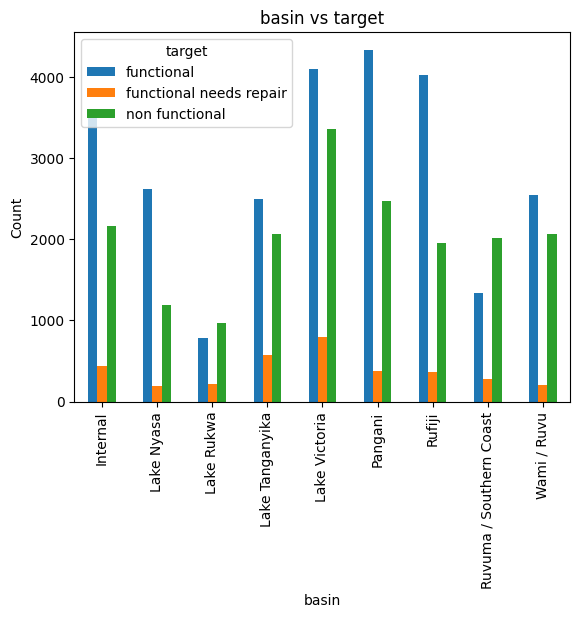

<Figure size 800x600 with 0 Axes>

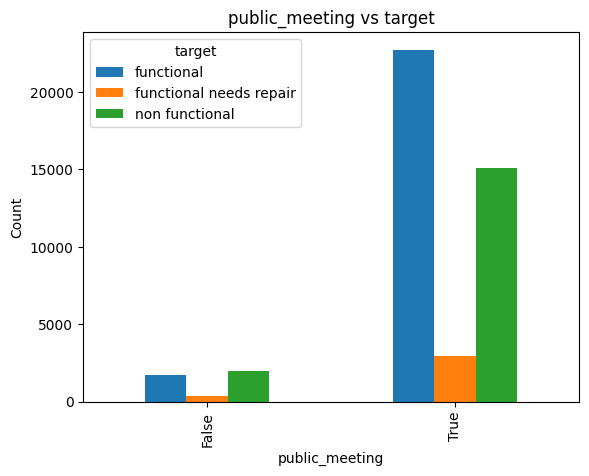

<Figure size 800x600 with 0 Axes>

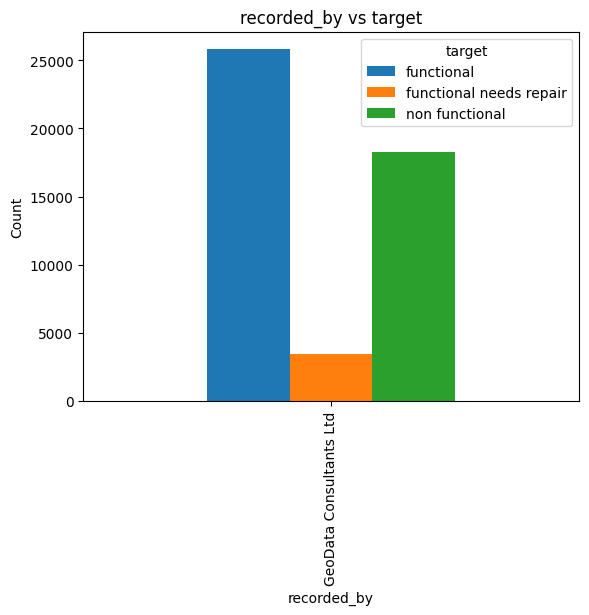

<Figure size 800x600 with 0 Axes>

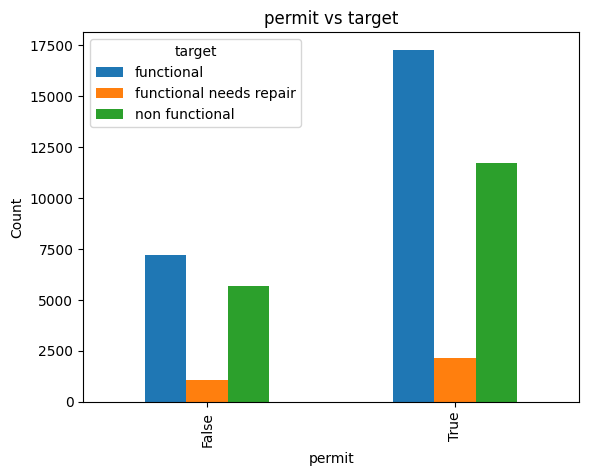

<Figure size 800x600 with 0 Axes>

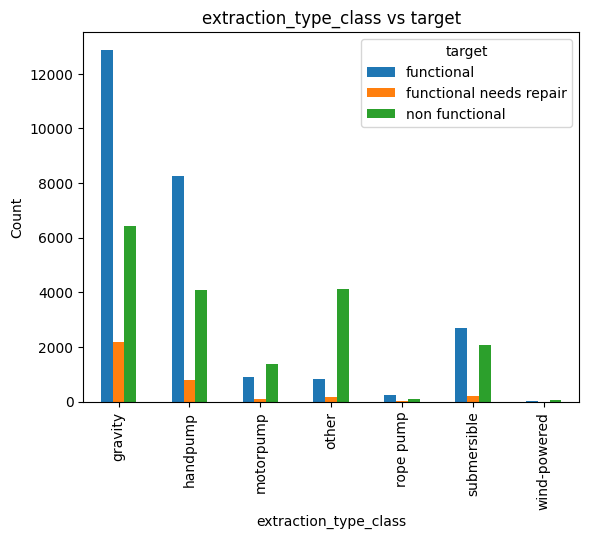

<Figure size 800x600 with 0 Axes>

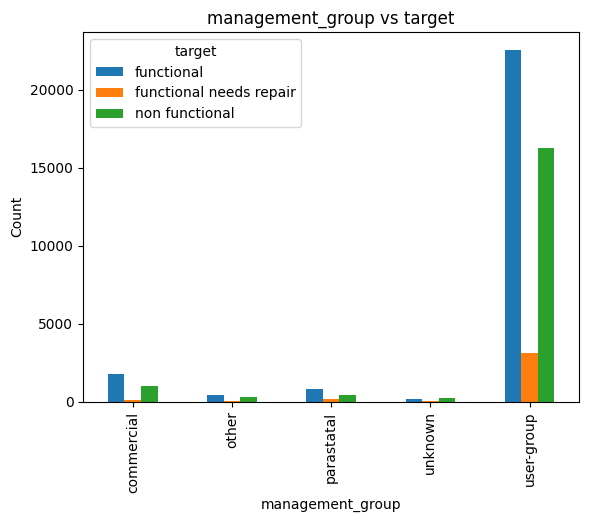

<Figure size 800x600 with 0 Axes>

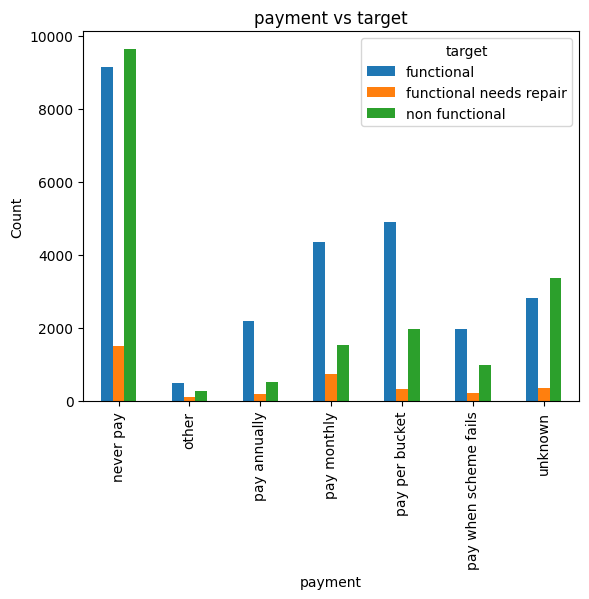

<Figure size 800x600 with 0 Axes>

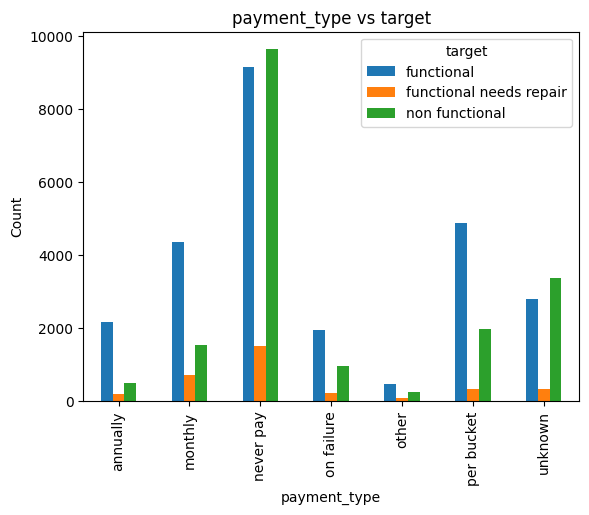

<Figure size 800x600 with 0 Axes>

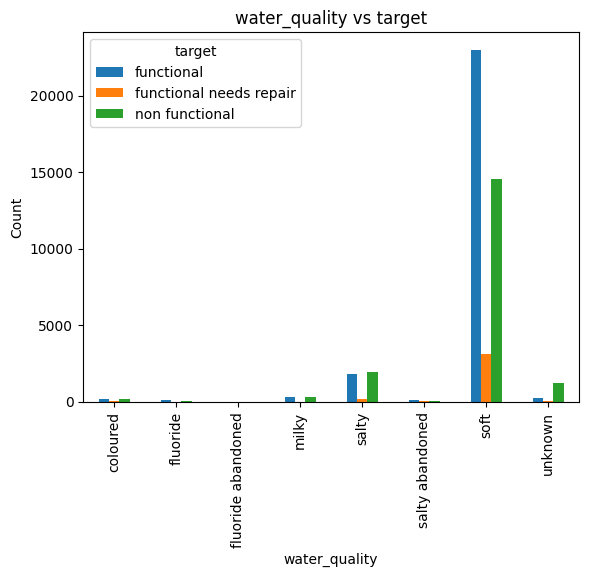

<Figure size 800x600 with 0 Axes>

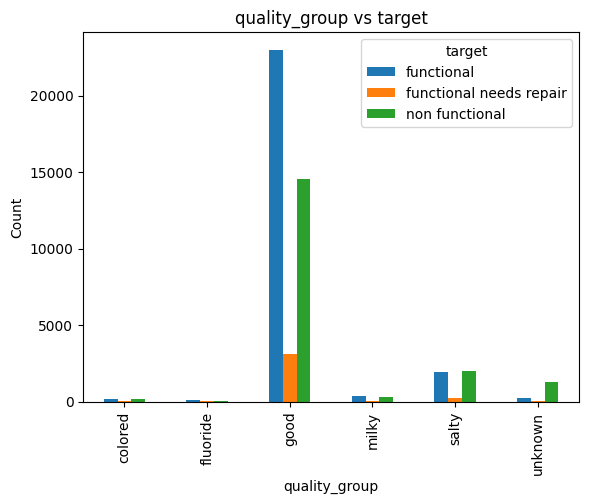

<Figure size 800x600 with 0 Axes>

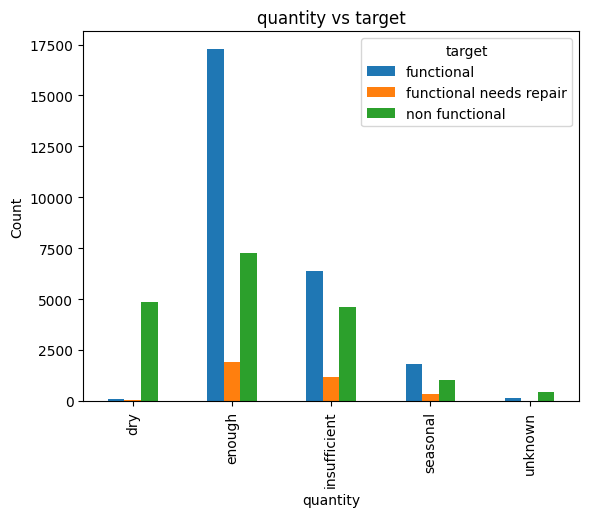

<Figure size 800x600 with 0 Axes>

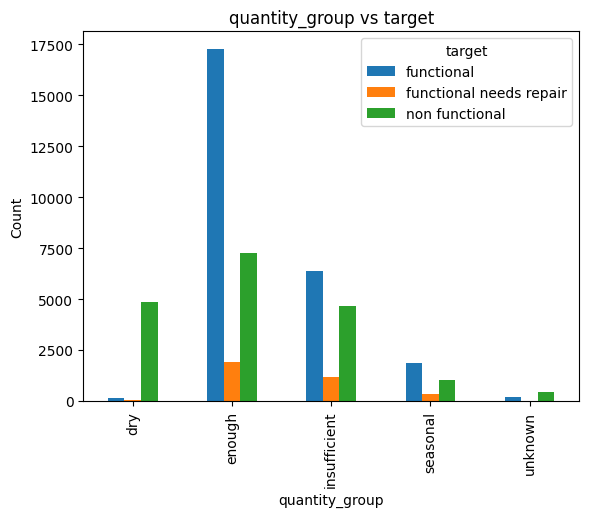

<Figure size 800x600 with 0 Axes>

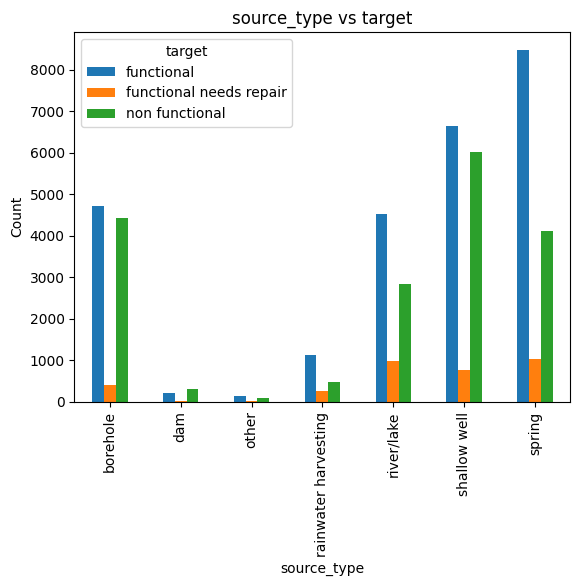

<Figure size 800x600 with 0 Axes>

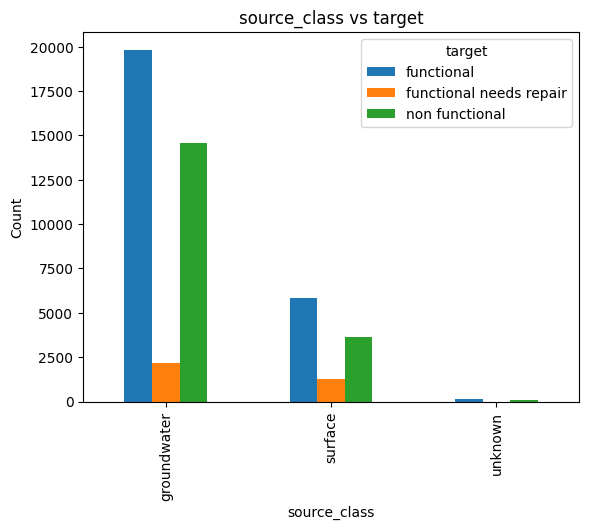

<Figure size 800x600 with 0 Axes>

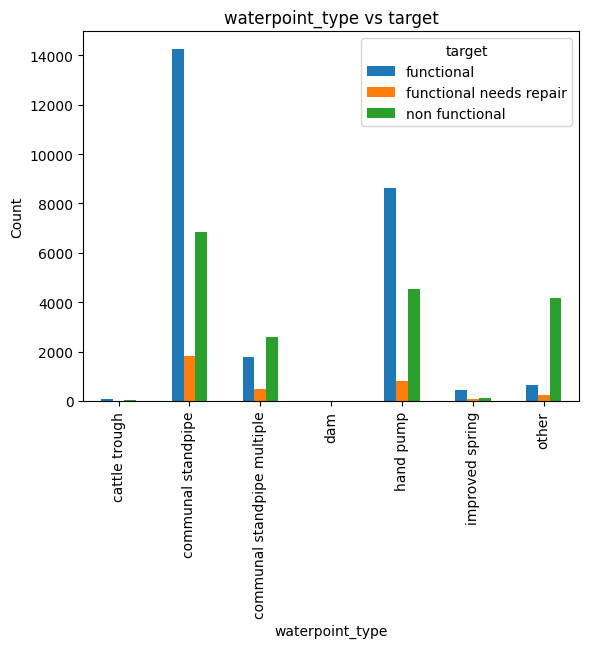

<Figure size 800x600 with 0 Axes>

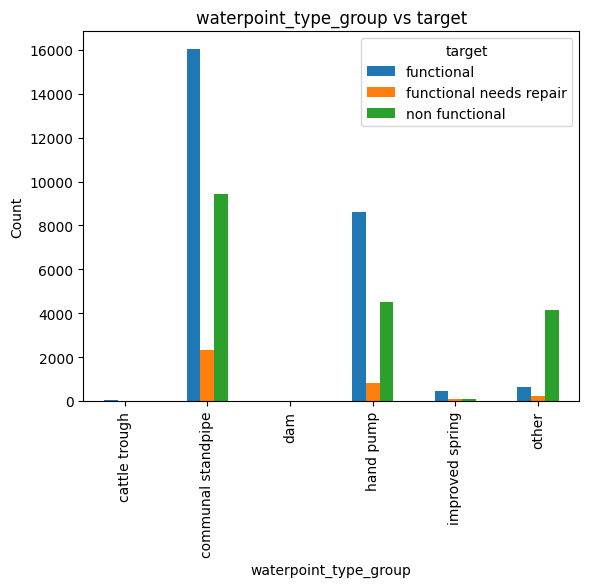

<Figure size 800x600 with 0 Axes>

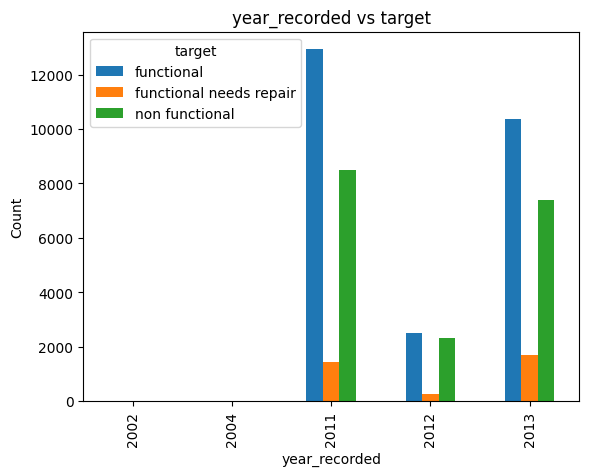

In [602]:
for col in cat_col:
    if X_train[col].nunique() < 10:
        plt.figure(figsize=(8, 6))
        category_counts = X_train.groupby([col, y_train]).size().unstack(fill_value=0)
        category_counts.plot(kind='bar', stacked=False)
        plt.title(f'{col} vs target')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.legend(title='target')
        plt.show()

In [603]:
num_cols = X_train.select_dtypes(exclude = ['category', 'datetime64[ns]']).columns

In [604]:
import seaborn as sns

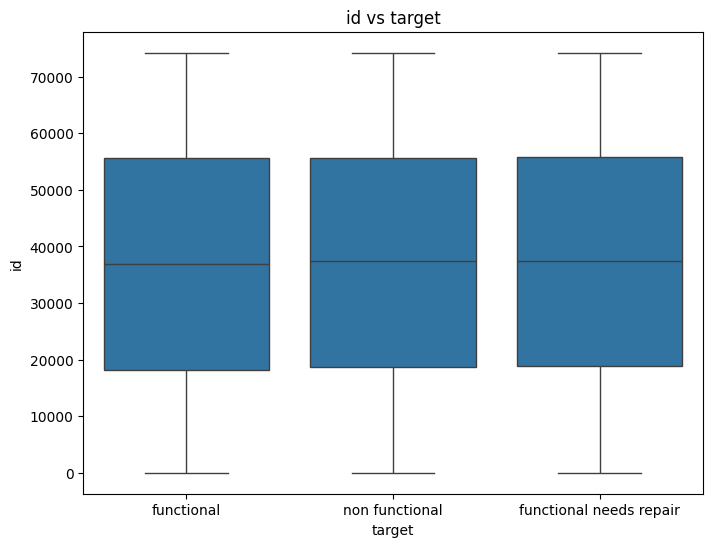

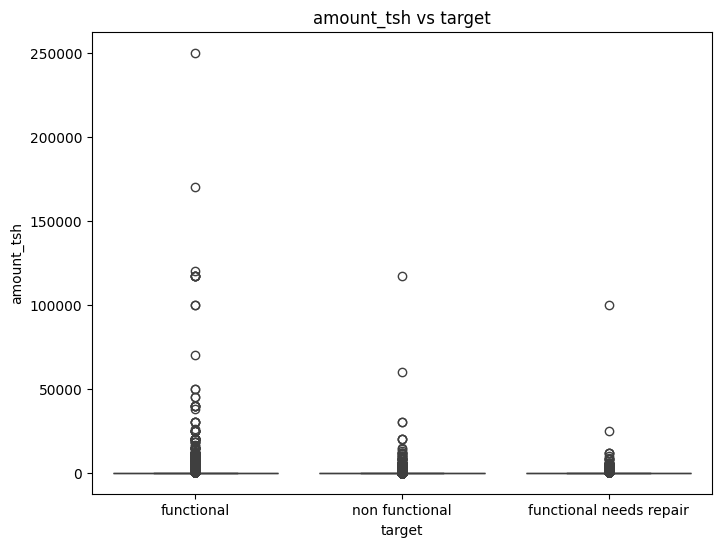

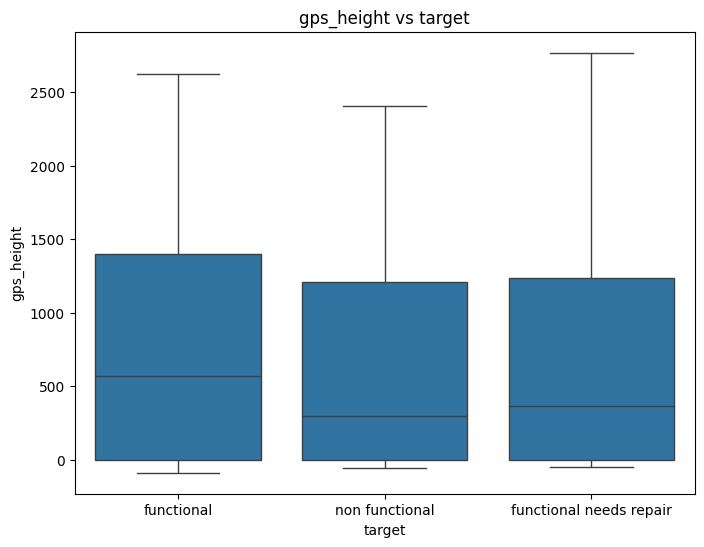

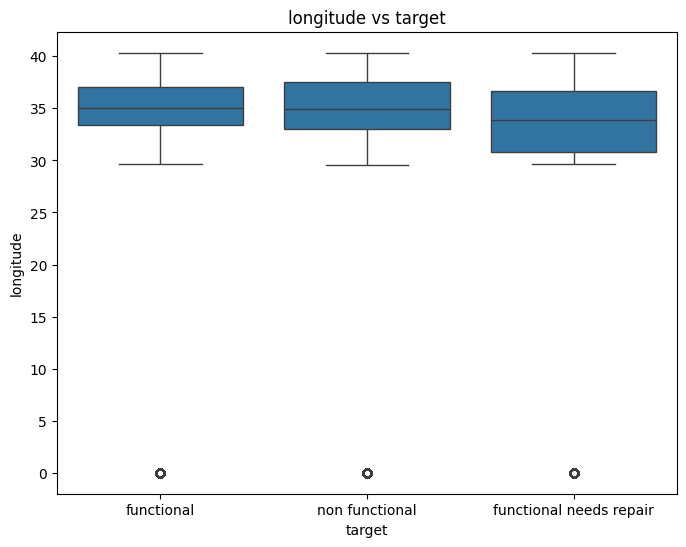

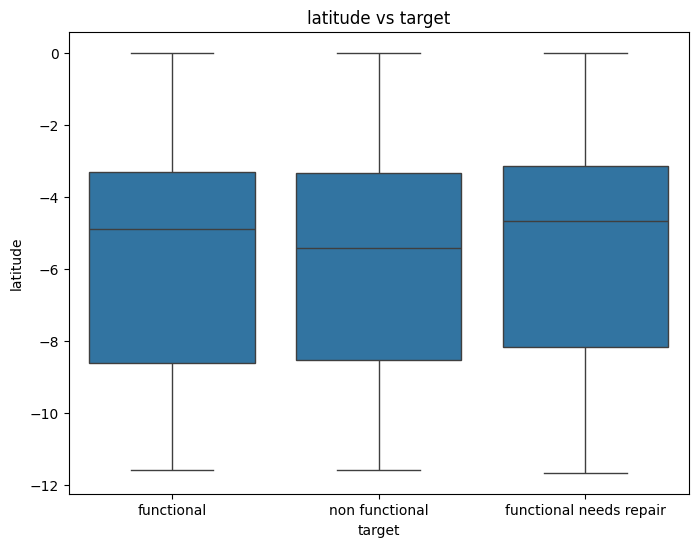

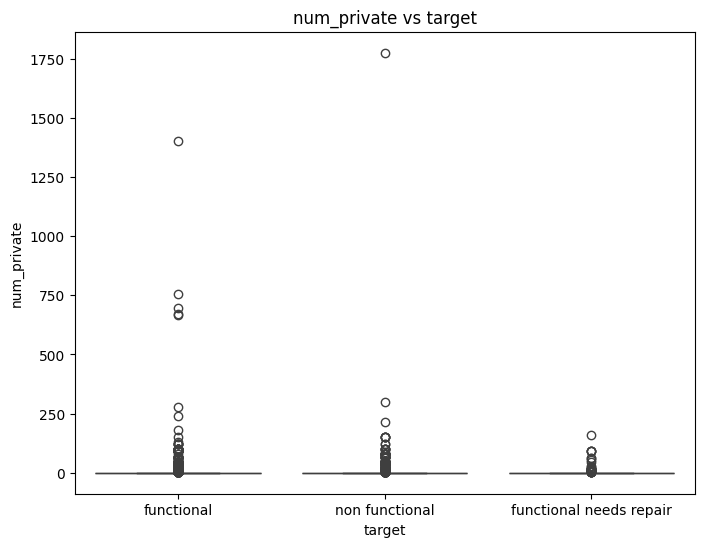

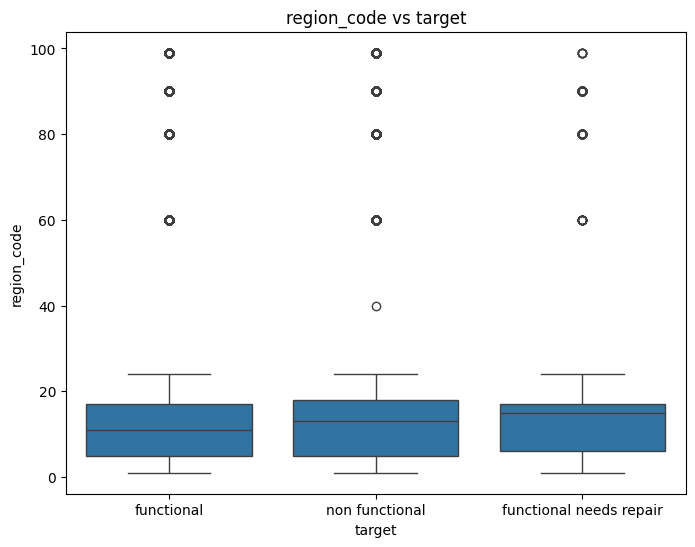

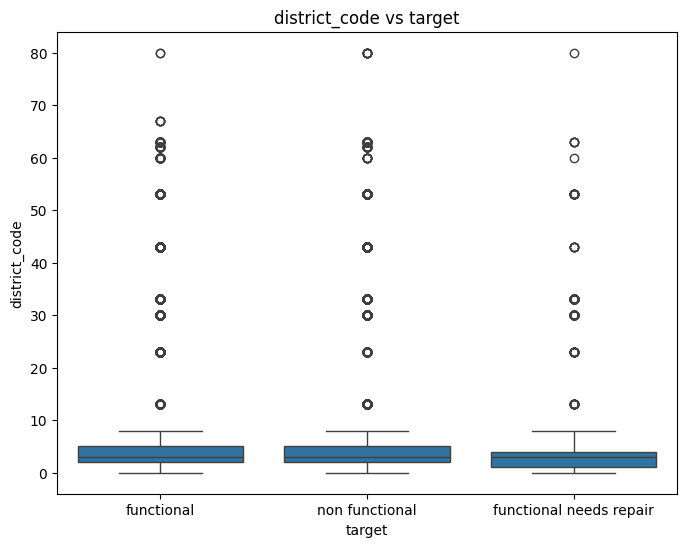

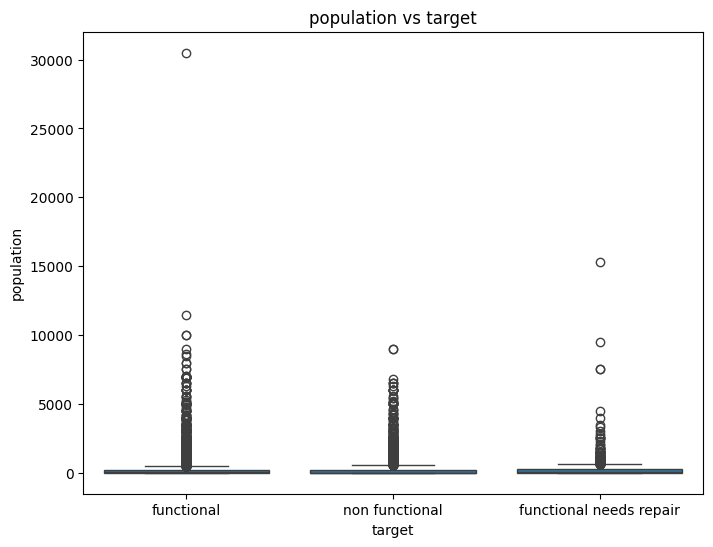

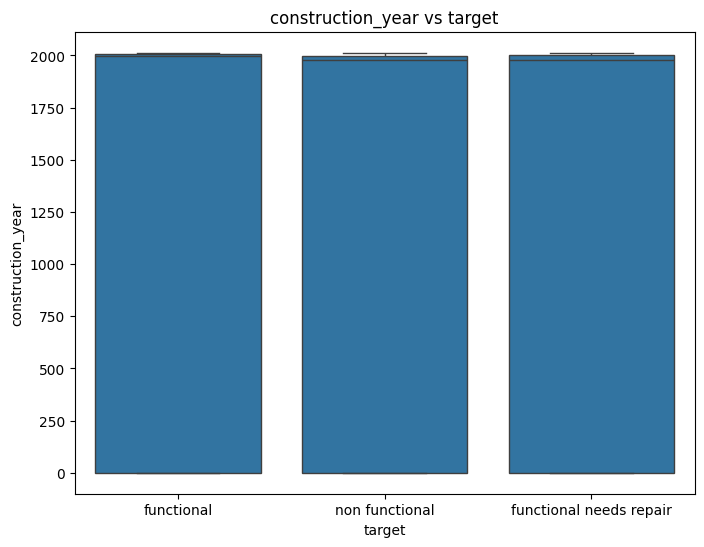

In [605]:
for col in num_cols:
    if X_train[col].dtype != 'category':
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=y_train, y=X_train[col])
        plt.title(f'{col} vs target')
        plt.xlabel('target')
        plt.ylabel(col)
        plt.show()

In [606]:
X_train.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,47520.000000,47520.000000,47520.000000,47520.000000,4.752000e+04,47520.000000,47520.000000,47520.000000,47520.000000,47520.000000
mean,37123.666309,306.608830,668.598253,34.082774,-5.699356e+00,0.496864,15.293119,5.636974,180.472306,1302.784512
std,21479.283663,2559.341637,692.394575,6.560459,2.950041e+00,13.327785,17.603073,9.642393,472.949258,950.922627
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18450.750000,0.000000,0.000000,33.089234,-8.532038e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37094.500000,0.000000,371.000000,34.912813,-5.010560e+00,0.000000,12.000000,3.000000,30.000000,1986.000000
75%,55694.250000,20.000000,1319.000000,37.184188,-3.323963e+00,0.000000,17.000000,5.000000,218.000000,2004.000000
max,74247.000000,250000.000000,2770.000000,40.344301,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [607]:
#X_train.isna().any()
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 47520 entries, 55424 to 2732
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     47520 non-null  int64   
 1   amount_tsh             47520 non-null  float64 
 2   funder                 44639 non-null  category
 3   gps_height             47520 non-null  int64   
 4   installer              44631 non-null  category
 5   longitude              47520 non-null  float64 
 6   latitude               47520 non-null  float64 
 7   wpt_name               47518 non-null  category
 8   num_private            47520 non-null  int64   
 9   basin                  47520 non-null  category
 10  subvillage             47221 non-null  category
 11  region                 47520 non-null  category
 12  region_code            47520 non-null  int64   
 13  district_code          47520 non-null  int64   
 14  population             47520 non-null  i

In [608]:
import warnings
warnings.simplefilter('ignore')
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression


## Imputation  & Scaling & Encoding


In [609]:
#Drop 'scheme_name' 
# Missing value:  'funder', installer', 'wpt_name','subvillage', 'public meeting', 'scheme_management', 'permit'

In [610]:
for df in [X_train,X_test]:
    drop_col = ['scheme_name','id','longitude','latitude']
    
    df.drop(columns = [col for col in drop_col if col in df.columns], inplace = True)
    for col in df.columns:
        if df[col].isna().any():
            if df[col].dtype == 'category':
                imputer = SimpleImputer(strategy='most_frequent')
                df[col] = pd.Categorical(imputer.fit_transform(df[[col]]).flatten())
            elif pd.api.types.is_numeric_dtype(df[col]):
                imputer = IterativeImputer(estimator=LinearRegression())
                df[col] = imputer.fit_transform(df[[col]]).ravel()


In [611]:
#Scaling 'amount_tsh', 'gps_height' , 'population'
#Convert  'num_private', 'region_code', 'district_code', 'contruction_year' 
# Encoding 

In [612]:
from sklearn.preprocessing import StandardScaler

In [613]:
for df in [X_train, X_test]:
    scal_col = ['amount_tsh', 'gps_height', 'population']
    cat_col = ['num_private','region_code','district_code','construction_year',]
    
    for col in scal_col : 
        if col in df.columns:
            scaler = StandardScaler()
            df[[col]] = scaler.fit_transform(df[[col]])
    for col in cat_col:
        if col in df.columns:
            df[col]= df[col].astype('category')

    

In [614]:
X_train.head()

,amount_tsh,funder,gps_height,installer,wpt_name,num_private,basin,subvillage,region,region_code,district_code,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,year_recorded,month_recorded,day_recorded,location
55424,-0.119801,Government Of Tanzania,1.294654,DWE,Msikitini,0,Pangani,Irente Juu,Tanga,4,1,-0.379479,1.0,GeoData Consultants Ltd,VWC,1.0,1994,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2011,4,7,Lushoto_Lushoto
28170,-0.100265,Government Of Tanzania,1.232550,Government,Kwa Mong`I,0,Internal,Kanisani,Manyara,21,4,-0.379479,0.0,GeoData Consultants Ltd,Water Board,0.0,1997,submersible,submersible,submersible,water board,user-group,pay per bucket,per bucket,salty,salty,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,2013,2,12,Kiteto_Kibaya
20007,-0.119801,Ncaa,1.688942,NCAA,Shuleni,0,Internal,Madukani,Arusha,2,5,-0.000999,1.0,GeoData Consultants Ltd,VWC,1.0,1974,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,2013,3,30,Ngorongoro_Endulen
7842,-0.119801,Government Of Tanzania,0.880146,District council,Kwa Joseph Kiliani,0,Pangani,Kihemba,Kilimanjaro,3,1,-0.379479,1.0,GeoData Consultants Ltd,Company,1.0,1988,gravity,gravity,gravity,company,commercial,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2013,2,18,Rombo_Kisale Msangara
22217,-0.022119,Oxfam,0.828152,OXFAM,Kwa Johndas,0,Lake Tanganyika,Kibuye,Kigoma,16,2,0.295019,1.0,GeoData Consultants Ltd,Water authority,1.0,1999,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,2013,2,9,Kasulu_Janda


In [615]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [616]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47520 entries, 55424 to 2732
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   amount_tsh             47520 non-null  float64 
 1   funder                 47520 non-null  category
 2   gps_height             47520 non-null  float64 
 3   installer              47520 non-null  category
 4   wpt_name               47520 non-null  category
 5   num_private            47520 non-null  category
 6   basin                  47520 non-null  category
 7   subvillage             47520 non-null  category
 8   region                 47520 non-null  category
 9   region_code            47520 non-null  category
 10  district_code          47520 non-null  category
 11  population             47520 non-null  float64 
 12  public_meeting         47520 non-null  category
 13  recorded_by            47520 non-null  category
 14  scheme_management      47520 non-null  c

In [617]:
X_train.shape

(47520, 37)

In [566]:
X_test.shape

(11880, 37)

In [618]:

def encode(df):
    # Separate categorical and non-categorical columns
    cat_cols = df.select_dtypes(include='category').columns
    num_cols = df.select_dtypes(exclude='category').columns

    # DataFrames for categorical and non-categorical columns
    df_cat = df[cat_cols]
    df_num = df[num_cols]
    
    print(f"Categorical columns shape: {df_cat.shape}")
    print(f"Non-categorical columns shape: {df_num.shape}")

    # Process categorical columns
    encoded_dfs = []
    for col in cat_cols:
        print(f"Processing column: {col}")
        value_counts = df_cat[col].value_counts()
        top_categories = value_counts.head(4).index
        df_cat[col] = df_cat[col].apply(lambda x: x if x in top_categories else 'Other')
        
        df_cat[col] = df_cat[col].astype(str)

        # OneHotEncoding
        encoder = OneHotEncoder(drop='first', sparse_output=False)
        encoded = encoder.fit_transform(df_cat[[col]])
        encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out([col]))

        # Debug: Print the shape of the encoded DataFrame
        print(f"Encoded shape for {col}: {encoded_df.shape}")

        # Collect encoded DataFrames
        encoded_dfs.append(encoded_df)
    
    # Concatenate all encoded DataFrames
    if encoded_dfs:
        df_encoded = pd.concat(encoded_dfs, axis=1)
    else:
        df_encoded = pd.DataFrame()  # No categorical columns

    # Debug: Print the shape of the encoded DataFrame
    print(f"Concatenated encoded DataFrames shape: {df_encoded.shape}")

    # Concatenate non-categorical columns with encoded columns
    df_final = pd.concat([df_num, df_encoded], axis=1)
    
    # Debug: Print the final DataFrame shape
    print(f"Final shape: {df_final.shape}")
    
    return df_final



In [619]:
encode(X_train)

Categorical columns shape: (47520, 34)
Non-categorical columns shape: (47520, 3)
Processing column: funder
Encoded shape for funder: (47520, 4)
Processing column: installer
Encoded shape for installer: (47520, 4)
Processing column: wpt_name
Encoded shape for wpt_name: (47520, 4)
Processing column: num_private
Encoded shape for num_private: (47520, 4)
Processing column: basin
Encoded shape for basin: (47520, 4)
Processing column: subvillage
Encoded shape for subvillage: (47520, 4)
Processing column: region
Encoded shape for region: (47520, 4)
Processing column: region_code
Encoded shape for region_code: (47520, 4)
Processing column: district_code
Encoded shape for district_code: (47520, 4)
Processing column: public_meeting
Encoded shape for public_meeting: (47520, 1)
Processing column: recorded_by
Encoded shape for recorded_by: (47520, 0)
Processing column: scheme_management
Encoded shape for scheme_management: (47520, 4)
Processing column: permit
Encoded shape for permit: (47520, 1)
Pr

,amount_tsh,gps_height,population,funder_Government Of Tanzania,funder_Hesawa,funder_Other,funder_Rwssp,installer_DWE,installer_Government,installer_Other,installer_RWE,wpt_name_Other,wpt_name_Shuleni,wpt_name_Zahanati,wpt_name_none,num_private_1,num_private_5,num_private_6,num_private_Other,basin_Lake Victoria,basin_Other,basin_Pangani,basin_Rufiji,subvillage_Madukani,subvillage_Majengo,subvillage_Other,subvillage_Shuleni,region_Kilimanjaro,region_Mbeya,region_Other,region_Shinyanga,region_code_12,region_code_17,region_code_3,region_code_Other,district_code_2,district_code_3,district_code_4,district_code_Other,public_meeting_1.0,scheme_management_VWC,scheme_management_WUA,scheme_management_WUG,scheme_management_Water authority,permit_1.0,construction_year_2008,construction_year_2009,construction_year_2010,construction_year_Other,extraction_type_gravity,extraction_type_nira/tanira,extraction_type_other,extraction_type_submersible,extraction_type_group_gravity,extraction_type_group_nira/tanira,extraction_type_group_other,extraction_type_group_submersible,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_other,extraction_type_class_submersible,management_vwc,management_water board,management_wua,management_wug,management_group_commercial,management_group_other,management_group_parastatal,management_group_user-group,payment_never pay,payment_pay monthly,payment_pay per bucket,payment_unknown,payment_type_monthly,payment_type_never pay,payment_type_per bucket,payment_type_unknown,water_quality_milky,water_quality_salty,water_quality_soft,water_quality_unknown,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_group_dry,quantity_group_enough,quantity_group_insufficient,quantity_group_seasonal,source_machine dbh,source_river,source_shallow well,source_spring,source_type_borehole,source_type_river/lake,source_type_shallow well,source_type_spring,source_class_surface,source_class_unknown,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_hand pump,waterpoint_type_other,waterpoint_type_group_communal standpipe,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other,year_recorded_2011,year_recorded_2012,year_recorded_2013,year_recorded_Other,month_recorded_2,month_recorded_3,month_recorded_7,month_recorded_Other,day_recorded_18,day_recorded_3,day_recorded_4,day_recorded_Other,location_Njombe_Imalinyi,location_Njombe_Mdandu,location_Other,location_Siha_Siha Kati
55424,-0.119801,1.294654,-0.379479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28170,-0.100265,1.232550,-0.379479,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
20007,-0.119801,1.688942,-0.000999,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.